In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x

rr = np.arange(12, 17, 1)
ee = [0,1,2,3,4,5,6,7,8,9,10]


rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * ee / 10
total_N_c = total_N_c.flatten()

C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm
cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952



3.39e+13


In [6]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from astropy.constants import c
# import astropy.units as u

# # 데이터 및 상수 설정
# rr = np.arange(12, 17, 1)
# ee = [0,1,2,3,4,5,6,7,8,9,10]
# # ee=[2]

# rr_reshaped = rr.reshape(-1, 1)
# total_N_c = 10**rr_reshaped * ee / 10
# total_N_c = total_N_c.flatten()

# C_IV_K = 1548.187e-8  # cm
# C_IV_H = 1550.772e-8  # cm
# cc = c.to(u.cm / u.s).value
# v_th = 11.7673179819719e5  # cm/s

# K_gamma = 2.65e+8
# H_gamma = 2.64e+8
# f_CIV_K = 0.190
# f_CIV_H = 0.0952

# nu_C_IV_K = cc / C_IV_K  # s-1
# nu_C_IV_H = cc / C_IV_H  # s-1

# xx_1 = np.zeros(len(rr) * len(ee))
# scat_1 = np.zeros(len(rr) * len(ee))

# directory_1 = '~/RT/C_IV/code_tes/data_C_IV_out/'
# n = 0

# for ii, num in enumerate(rr):
#     for jj, bb in enumerate(ee):
#         if bb == 0:
#             path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{bb}00E+00_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
#         elif bb == 10:
#             gg = 1
#             path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{gg}00E+03_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
#         else:
#             path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{bb}00E+02_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'


#         # 데이터 읽기
#         try:
#             data_sp_1 = pd.read_csv(path_sp_1, sep='\s+', header=None)
#         except FileNotFoundError:
#             print(f"파일을 찾을 수 없습니다: {path_sp_1}")
#             continue

#         sp_dlam_1 = data_sp_1[0].to_numpy()
#         sp_1 = data_sp_1[1].to_numpy()

#         indices_K_1 = np.where(sp_dlam_1 <= 1550)[0]
#         indices_H_1 = np.where(sp_dlam_1 > 1550)[0]

#         sp_dlam_K = sp_dlam_1[indices_K_1]
#         sp_dlam_H = sp_dlam_1[indices_H_1]

#         dlam_k = sp_dlam_K[1]-sp_dlam_K[0]
#         dlam_h = sp_dlam_H[1]-sp_dlam_H[0]
#         dlam_sp =sp_dlam_1[1] -sp_dlam_1[0]
#         print(dlam_k ,dlam_h,dlam_sp)

#         sp_K = sp_1[indices_K_1]
#         sp_H = sp_1[indices_H_1]

#         if len(sp_K) == 0 or len(sp_H) == 0:
#             print(f"데이터 부족: {path_sp_1}")
#             continue

#         # p_1 = np.argmax(sp_K)
#         # K_line_peak_lam = sp_dlam_K[p_1]
#         # K_line_peak_flux = sp_K[p_1]

#         # p_2 = np.argmax(sp_H)
#         # H_line_peak_lam = sp_dlam_H[p_2]
#         # H_line_peak_flux = sp_H[p_2]

#         nu_space = (cc / (sp_dlam_1 * 1e-8))


        
#         del_V_space = (nu_C_IV_K / nu_space - 1) * cc / 1e5  # km/s



#         indices_K_V = np.where((del_V_space<100)& (del_V_space>-100))[0]
#         indices_H_V = np.where((del_V_space<600)& (del_V_space>400))[0]

#         sp_V_K = del_V_space[indices_K_V]
#         sp_V_H = del_V_space[indices_H_V]

#         sp_K_f = sp_1[indices_K_V]
#         sp_H_f = sp_1[indices_H_V] 

#         KK = np.argmax(sp_K_f)
#         HH = np.argmax(sp_H_f)
#         K_line_peak_flux = sp_K_f[KK]
#         H_line_peak_flux = sp_H_f[HH]



#         pp_1 = np.where(sp_1 == K_line_peak_flux)[0]
#         pp_1 = pp_1[0] if pp_1.size > 0 else None
#         pp_2 = np.where(sp_1 == H_line_peak_flux)[0]
#         pp_2 = pp_2[-1] if pp_2.size > 0 else None

#         peak_K_V, peak_K_flux = del_V_space[pp_1], sp_1[pp_1]
#         peak_H_V, peak_H_flux = del_V_space[pp_2], sp_1[pp_2]








#         del_V_space_K = (peak_K_V/ sp_V_K - 1) * cc / 1e5  # km/s
#         del_V_space_H = (peak_H_V/ nu_space - 1) * cc / 1e5  # km/s


#         globals()[f'K_dv_{bb}_{num}'] = del_V_space_K

#         globals()[f'Kf_{bb}_{num}'] =sp_K_f

#         # print(len(del_V_space_K),len(sp_K_f))


#         globals()[f'H_dv_{bb}_{num}'] = del_V_space_H
#         globals()[f'Hf_{bb}_{num}'] = sp_H_f

#         sep_point = abs(peak_H_V - peak_K_V) / 2
#         # print(sep_point)
#         indices_K_sp = np.where(del_V_space <= sep_point)[0]
#         indices_H_sp = np.where(del_V_space > sep_point)[0]

#         int_Vel_K = del_V_space[indices_K_sp]
#         int_Vel_H = del_V_space[indices_H_sp]

#         xx1 = sp_dlam_1[indices_K_sp]
#         yy1 = sp_1[indices_K_sp]



#         int_flux_K = sp_1[indices_K_sp]
#         int_flux_H = sp_1[indices_H_sp]


#         H_nu = (C_IV_H/C_IV_K -1 )*cc/1e5

#         dh = peak_H_V - H_nu  
#         # globals()[f'I_K_dv_{bb}_{num}'] = int_Vel_K #-peak_K_V
#         globals()[f'I_K_dv_{bb}_{num}'] = int_Vel_K 
#         globals()[f'I_K_f_{bb}_{num}'] =  int_flux_K

#         globals()[f'xx_{bb}_{num}'] =  xx1 
#         # globals()[f'yy_{bb}_{num}'] =  yy1 



#         globals()[f'I_H_dv_{bb}_{num}'] = int_Vel_H  # - dh
#         globals()[f'I_H_f_{bb}_{num}'] = int_flux_H      

        
#         # print(bb,num)
#         # 주석 처리된 플로팅 코드
#         # plt.plot(int_Vel_K - peak_K_V, int_flux_K, label='K Line')
#         # plt.plot(int_Vel_H - dh, int_flux_H, label='H Line')
#         # plt.plot(peak_K_V - peak_K_V, peak_K_flux, 'ro', label='K Peak')
#         # plt.plot(peak_H_V-peak_K_V, peak_H_flux, 'bo', label='H Peak')
#         # plt.axvline(x=0,ymin=0,ymax=4000,color='k',linestyle=':')
#         # print(np.where(globals()[f'I_K_dv_{bb}_{num}'] == 0))

#         # plt.xlim(-200, 1000)
#         # # plt.legend()
#         # # plt.show()

857.0


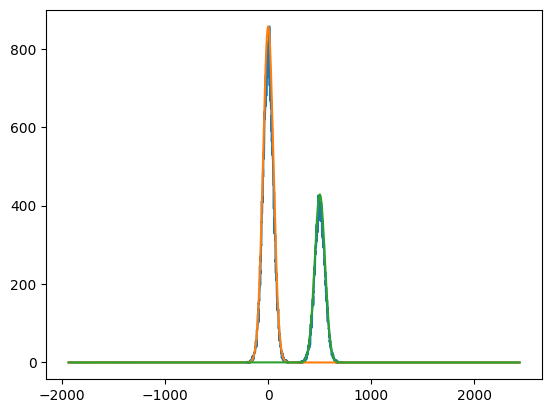

In [26]:
directory_1 = '~/RT/C_IV/code_tes/data_photon_1e6/'
path_sp_1 = f'{directory_1}N_atom000E+00_Vexp000E+00_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'

data_sp_1 = pd.read_csv(path_sp_1, sep='\s+', header=None)
yy_g= data_sp_1[1]
# plt.plot(data_sp_1[0],data_sp_1[1])

nu_space = (cc / (sp_dlam_1 * 1e-8))
del_V_space_g = (nu_C_IV_K / nu_space - 1) * cc / 1e5  # km/s
nu_C_IV_K = cc / C_IV_K  # s-1

plt.plot(del_V_space_g,yy_g)

def g(x,x_0,sig):
    tt = (x-x_0)/sig
    aa = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-tt**2/2)
    return aa 
y_1 = g(del_V_space_g,0,50)
t1 = 1/y_1.max()
ff = yy_g.max()

H_nu = (C_IV_H/C_IV_K -1 )*cc/1e5
y_2 = g(del_V_space_g,H_nu,50)

print(ff)
plt.plot(del_V_space_g,y_1*ff*t1)

plt.plot(del_V_space_g ,y_2*ff*t1/2)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.constants import c
import astropy.units as u

# 데이터 및 상수 설정
rr = np.arange(12, 17, 1)
ee = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
# ee=[2]

rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * ee / 10
total_N_c = total_N_c.flatten()

C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm
cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952

nu_C_IV_K = cc / C_IV_K  # s-1
nu_C_IV_H = cc / C_IV_H  # s-1

xx_1 = np.zeros(len(rr) * len(ee))
scat_1 = np.zeros(len(rr) * len(ee))

directory_1 = '~/RT/C_IV/code_tes/data_C_IV_out/'
n = 0

for ii, num in enumerate(rr):
    for jj, bb in enumerate(ee):
        if bb == 0:
            path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{bb}00E+00_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
        elif bb == 10 :
            gg = 1
            path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{gg}00E+03_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
        elif  bb == -10:
            gg = -1
            path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{gg}00E+03_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
        else:
            path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{bb}00E+02_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'


        # 데이터 읽기
        try:
            data_sp_1 = pd.read_csv(path_sp_1, sep='\s+', header=None)
        except FileNotFoundError:
            print(f"파일을 찾을 수 없습니다: {path_sp_1}")
            continue

        sp_dlam_1 = data_sp_1[0].to_numpy()
        sp_1 = data_sp_1[1].to_numpy()

        indices_K_1 = np.where(sp_dlam_1 <= 1550)[0]
        indices_H_1 = np.where(sp_dlam_1 > 1550)[0]

        sp_dlam_K = sp_dlam_1[indices_K_1]
        sp_dlam_H = sp_dlam_1[indices_H_1]

        dlam_k = sp_dlam_K[1]-sp_dlam_K[0]
        dlam_h = sp_dlam_H[1]-sp_dlam_H[0]
        dlam_sp =sp_dlam_1[1] -sp_dlam_1[0]
        print(dlam_k ,dlam_h,dlam_sp)

        sp_K = sp_1[indices_K_1]
        sp_H = sp_1[indices_H_1]

        if len(sp_K) == 0 or len(sp_H) == 0:
            print(f"데이터 부족: {path_sp_1}")
            continue

        # p_1 = np.argmax(sp_K)
        # K_line_peak_lam = sp_dlam_K[p_1]
        # K_line_peak_flux = sp_K[p_1]

        # p_2 = np.argmax(sp_H)
        # H_line_peak_lam = sp_dlam_H[p_2]
        # H_line_peak_flux = sp_H[p_2]

        nu_space = (cc / (sp_dlam_1 * 1e-8))
        del_V_space = (nu_C_IV_K / nu_space - 1) * cc / 1e5  # km/s


        indices_K_V = np.where((del_V_space<100)& (del_V_space>-100))[0]
        indices_H_V = np.where((del_V_space<600)& (del_V_space>400))[0]

        sp_V_K = del_V_space[indices_K_V]
        sp_V_H = del_V_space[indices_H_V]

        sp_K_f = sp_1[indices_K_V]
        sp_H_f = sp_1[indices_H_V] 

        KK = np.argmax(sp_K_f)
        HH = np.argmax(sp_H_f)
        K_line_peak_flux = sp_K_f[KK]
        H_line_peak_flux = sp_H_f[HH]



        pp_1 = np.where(sp_1 == K_line_peak_flux)[0]
        pp_1 = pp_1[0] if pp_1.size > 0 else None
        pp_2 = np.where(sp_1 == H_line_peak_flux)[0]
        pp_2 = pp_2[-1] if pp_2.size > 0 else None

        peak_K_V, peak_K_flux = del_V_space[pp_1], sp_1[pp_1]
        peak_H_V, peak_H_flux = del_V_space[pp_2], sp_1[pp_2]








        del_V_space_K = (peak_K_V/ sp_V_K - 1) * cc / 1e5  # km/s
        del_V_space_H = (peak_H_V/ nu_space - 1) * cc / 1e5  # km/s


        globals()[f'K_dv_{bb}_{num}'] = del_V_space_K

        globals()[f'Kf_{bb}_{num}'] =sp_K_f

        # print(len(del_V_space_K),len(sp_K_f))


        globals()[f'H_dv_{bb}_{num}'] = del_V_space_H
        globals()[f'Hf_{bb}_{num}'] = sp_H_f

        sep_point = abs(peak_H_V - peak_K_V) / 2
        # print(sep_point)
        indices_K_sp = np.where(del_V_space <= sep_point)[0]
        indices_H_sp = np.where(del_V_space > sep_point)[0]

        int_Vel_K = del_V_space[indices_K_sp]
        int_Vel_H = del_V_space[indices_H_sp]

        int_flux_K = sp_1[indices_K_sp]
        int_flux_H = sp_1[indices_H_sp]


        H_nu = (C_IV_H/C_IV_K -1 )*cc/1e5

        dh = peak_H_V - H_nu  
        globals()[f'I_K_dv_{bb}_{num}'] = int_Vel_K 
        globals()[f'I_K_f_{bb}_{num}'] = int_flux_K

        globals()[f'I_H_dv_{bb}_{num}'] = int_Vel_H  
        globals()[f'I_H_f_{bb}_{num}'] = int_flux_H      

0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.00759999999

In [60]:
def gaus(x,x_0,sig):
    aa = (x-x_0)/sig
    tt =  1/np.sqrt(2*np.pi*sig**2) *np.exp(-aa**2/2)
    return tt

def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ


125.3368277081032
126.52989909510023


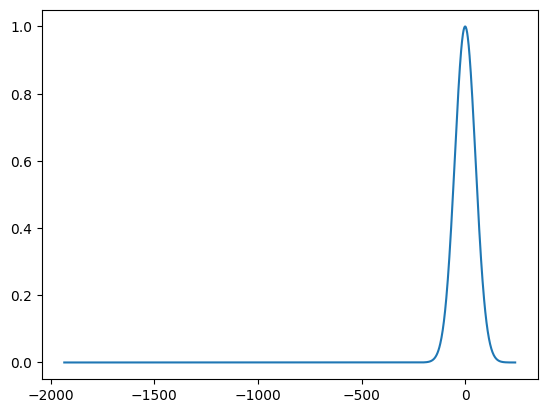

In [63]:
gg = gaus(I_K_dv_10_12,0,50)
max_f = 1/gg.max()
print(max_f)
print(inf(I_K_dv_10_12, gg*max_f) )
plt.plot(I_K_dv_10_12,gg * max_f)


(array([-400., -200.,    0.,  200.,  400.,  600.,  800.]),
 [Text(-400.0, 0, '−400'),
  Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800')])

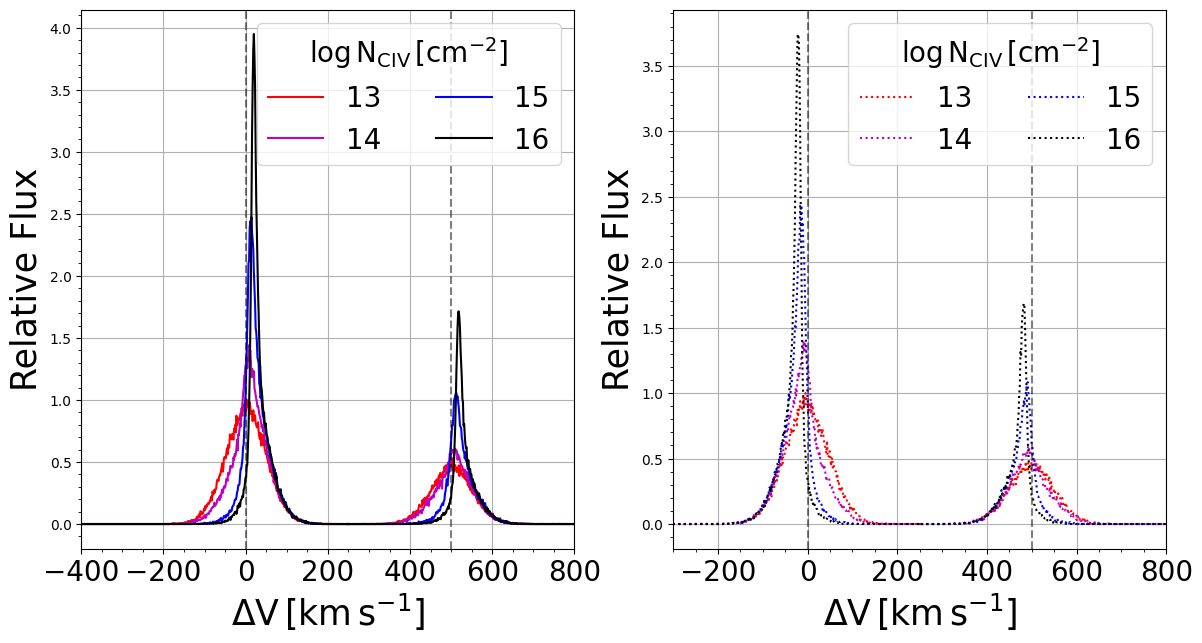

In [90]:
fig = plt.figure(1,figsize=(14,7))



plt.subplot(121)

focus_exp = 3
v_emit = 50
dnu = (nu_C_IV_K/nu_C_IV_H -1)*cc/1e5

# gauss_K =  gaus(globals()[f'I_K_dv_{focus_exp}_13'],0,v_emit)
# ms_K = 1/gauss_K.max()
# gauss_H =  gaus(globals()[f'I_H_dv_{focus_exp}_13'],dnu,v_emit)
# # ms_H = 1/gauss_H.max()


# max_K = globals()[f'I_K_f_{focus_exp}_13'].max()
# max_H = globals()[f'I_H_f_{focus_exp}_13'].max()

normal_f =  globals()[f'I_K_f_{focus_exp}_13'].max()  # inf(globals()[f'I_K_dv_{focus_exp}_13'],globals()[f'I_K_f_{focus_exp}_13']) 

# plt.plot(globals()[f'I_K_dv_{focus_exp}_13'], gauss_K*ms_K,'ko--')
# plt.plot(globals()[f'I_H_dv_{focus_exp}_13'], gauss_H*ms_K/2,'ko--')

plt.plot(globals()[f'I_K_dv_{focus_exp}_13'],globals()[f'I_K_f_{focus_exp}_13'] / normal_f ,'r-',label='13')
plt.plot(globals()[f'I_H_dv_{focus_exp}_13'],globals()[f'I_H_f_{focus_exp}_13'] / normal_f ,'r-')

# nn = globals()[f'I_K_f_{focus_exp}_13']

plt.plot(globals()[f'I_K_dv_{focus_exp}_14'],globals()[f'I_K_f_{focus_exp}_14']/normal_f ,'m-',label='14')
plt.plot(globals()[f'I_H_dv_{focus_exp}_14'],globals()[f'I_H_f_{focus_exp}_14']/normal_f ,'m-')


plt.plot(globals()[f'I_K_dv_{focus_exp}_15'],globals()[f'I_K_f_{focus_exp}_15'] / normal_f ,'b-',label='15')
plt.plot(globals()[f'I_H_dv_{focus_exp}_15'],globals()[f'I_H_f_{focus_exp}_15']/normal_f  ,'b-')

plt.plot(globals()[f'I_K_dv_{focus_exp}_16'],globals()[f'I_K_f_{focus_exp}_16'] / normal_f ,'k-',label='16')
plt.plot(globals()[f'I_H_dv_{focus_exp}_16'],globals()[f'I_H_f_{focus_exp}_16'] / normal_f ,'k-')



plt.xlim(-400, 800)
plt.minorticks_on()
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=2,title=r'$\log{{\rm N}_{\rm C IV}}\,[\rm cm ^{-2}]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)

plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle='--',alpha=0.5)
plt.axvline(x=dnu,ymin=0,ymax=5,color='k',linestyle='--',alpha=0.5)

plt.subplot(122)

focus_exp = -3

normal_f = globals()[f'I_K_f_{focus_exp}_13'].max()

plt.plot(globals()[f'I_K_dv_{focus_exp}_13'],globals()[f'I_K_f_{focus_exp}_13']/normal_f,'r:',label='13')
plt.plot(globals()[f'I_H_dv_{focus_exp}_13'],globals()[f'I_H_f_{focus_exp}_13'] / normal_f,'r:')

plt.plot(globals()[f'I_K_dv_{focus_exp}_14'],globals()[f'I_K_f_{focus_exp}_14']/normal_f,'m:',label='14')
plt.plot(globals()[f'I_H_dv_{focus_exp}_14'],globals()[f'I_H_f_{focus_exp}_14']/normal_f,'m:')


plt.plot(globals()[f'I_K_dv_{focus_exp}_15'],globals()[f'I_K_f_{focus_exp}_15']/normal_f,'b:',label='15')
plt.plot(globals()[f'I_H_dv_{focus_exp}_15'],globals()[f'I_H_f_{focus_exp}_15']/normal_f,'b:')

plt.plot(globals()[f'I_K_dv_{focus_exp}_16'],globals()[f'I_K_f_{focus_exp}_16']/normal_f,'k:',label='16')
plt.plot(globals()[f'I_H_dv_{focus_exp}_16'],globals()[f'I_H_f_{focus_exp}_16']/normal_f,'k:')

plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle='--',alpha=0.5)
dnu = (nu_C_IV_K/nu_C_IV_H -1)*cc/1e5
plt.axvline(x=dnu,ymin=0,ymax=5,color='k',linestyle='--',alpha=0.5)



plt.xlim(-300, 800)
plt.minorticks_on()
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=2,title=r'$\log{{\rm N}_{\rm C IV}}\,[\rm cm ^{-2}]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)

# plt.savefig('/home/jin/바탕화면/DelV_gauss_source_density.pdf',bbox_inches='tight')

In [ ]:
directory_1 = '~/RT/C_IV/code_tes/data_C_IV_out/'
n = 0
path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{bb}00E+00_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'

data_sp_1 = pd.read_csv(path_sp_1, sep='\s+', header=None)


sp_dlam_1 = data_sp_1[0].to_numpy()
sp_1 = data_sp_1[1].to_numpy()

(array([-400., -200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(-400.0, 0, '−400'),
  Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

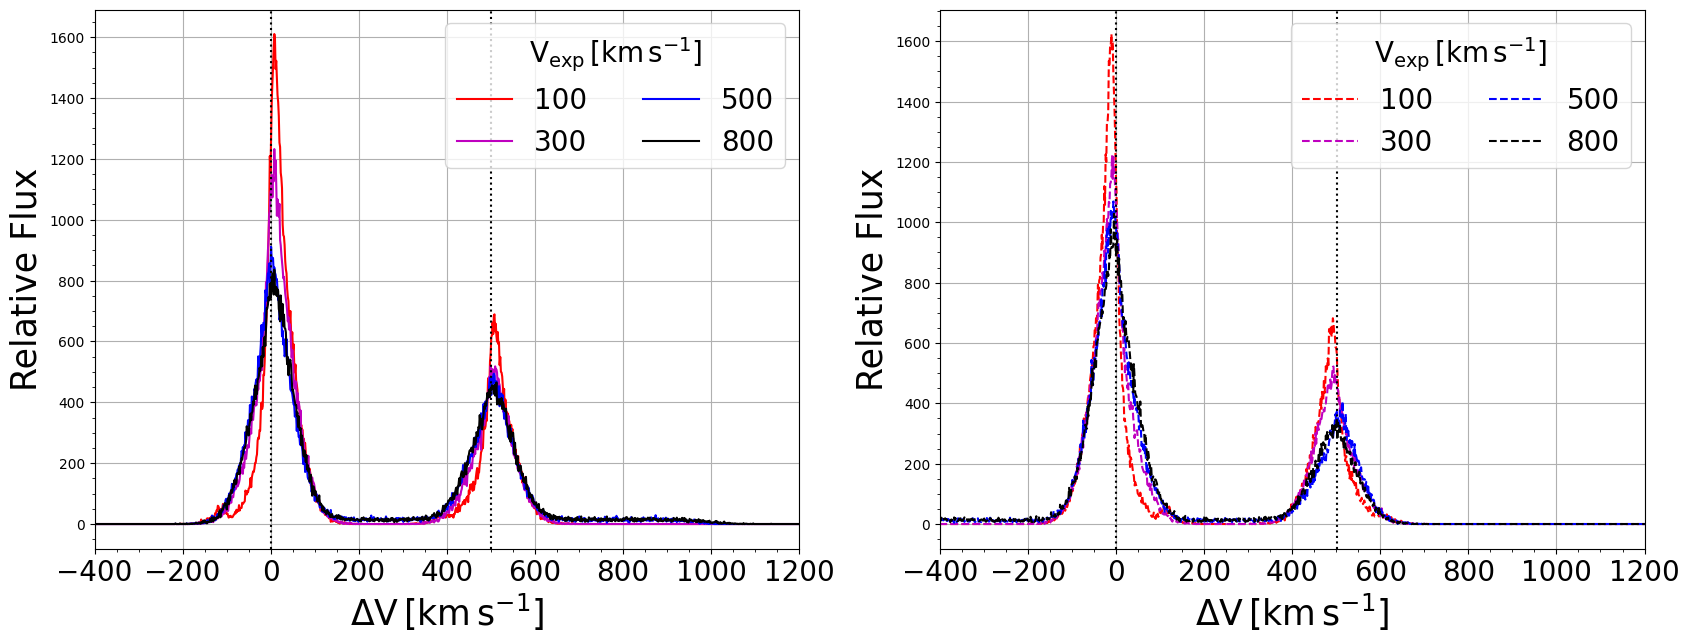

In [33]:
fig = plt.figure(1,figsize=(20,7))

plt.subplot(121)

focus_col = 14
plt.plot(globals()[f'I_K_dv_1_{focus_col}'],globals()[f'I_K_f_1_{focus_col}'],'r-',label='100')
plt.plot(globals()[f'I_H_dv_1_{focus_col}'],globals()[f'I_H_f_1_{focus_col}'],'r-')


plt.plot(globals()[f'I_K_dv_3_{focus_col}'],globals()[f'I_K_f_3_{focus_col}'],'m-',label='300')
plt.plot(globals()[f'I_H_dv_3_{focus_col}'],globals()[f'I_H_f_3_{focus_col}'],'m-')


plt.plot(globals()[f'I_K_dv_5_{focus_col}'],globals()[f'I_K_f_5_{focus_col}'],'b-',label='500')
plt.plot(globals()[f'I_H_dv_5_{focus_col}'],globals()[f'I_H_f_5_{focus_col}'],'b-')

plt.plot(globals()[f'I_K_dv_8_{focus_col}'],globals()[f'I_K_f_8_{focus_col}'],'k-',label='800')
plt.plot(globals()[f'I_H_dv_8_{focus_col}'],globals()[f'I_H_f_8_{focus_col}'],'k-')




plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle=':')
dnu = (nu_C_IV_K/nu_C_IV_H -1)*cc/1e5
plt.axvline(x=dnu,ymin=0,ymax=5,color='k',linestyle=':')


plt.xlim(-400, 1200)
plt.minorticks_on()
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=2,title=r'$\rm V_{\rm exp} \, [\rm km \, s^{-1}]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)


plt.subplot(122)

focus_col = 14
plt.plot(globals()[f'I_K_dv_-1_{focus_col}'],globals()[f'I_K_f_-1_{focus_col}'],'r--',label='100')
plt.plot(globals()[f'I_H_dv_-1_{focus_col}'],globals()[f'I_H_f_-1_{focus_col}'],'r--')


plt.plot(globals()[f'I_K_dv_-3_{focus_col}'],globals()[f'I_K_f_-3_{focus_col}'],'m--',label='300')
plt.plot(globals()[f'I_H_dv_-3_{focus_col}'],globals()[f'I_H_f_-3_{focus_col}'],'m--')


plt.plot(globals()[f'I_K_dv_-5_{focus_col}'],globals()[f'I_K_f_-5_{focus_col}'],'b--',label='500')
plt.plot(globals()[f'I_H_dv_-5_{focus_col}'],globals()[f'I_H_f_-5_{focus_col}'],'b--')

plt.plot(globals()[f'I_K_dv_-8_{focus_col}'],globals()[f'I_K_f_-8_{focus_col}'],'k--',label='800')
plt.plot(globals()[f'I_H_dv_-8_{focus_col}'],globals()[f'I_H_f_-8_{focus_col}'],'k--')




plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle=':')
dnu = (nu_C_IV_K/nu_C_IV_H -1)*cc/1e5
plt.axvline(x=dnu,ymin=0,ymax=5,color='k',linestyle=':')


plt.xlim(-400, 1200)
plt.minorticks_on()
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=2,title=r'$\rm V_{\rm exp} \, [\rm km \, s^{-1}]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)


# plt.savefig('/home/jin/바탕화면/DelV_gauss_source_Vexp.pdf',bbox_inches='tight')


In [373]:
def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

ratio = np.zeros((len(ee),len(rr)))

for ii,jj in enumerate(ee):
    for aa,bb in enumerate(rr):
        a_1 = inf(globals()[f'I_K_dv_{jj}_{bb}'],globals()[f'I_K_f_{jj}_{bb}'])
        a_2 = inf(globals()[f'I_H_dv_{jj}_{bb}'],globals()[f'I_H_f_{jj}_{bb}'])
        ratio[ii][aa] = a_1/a_2



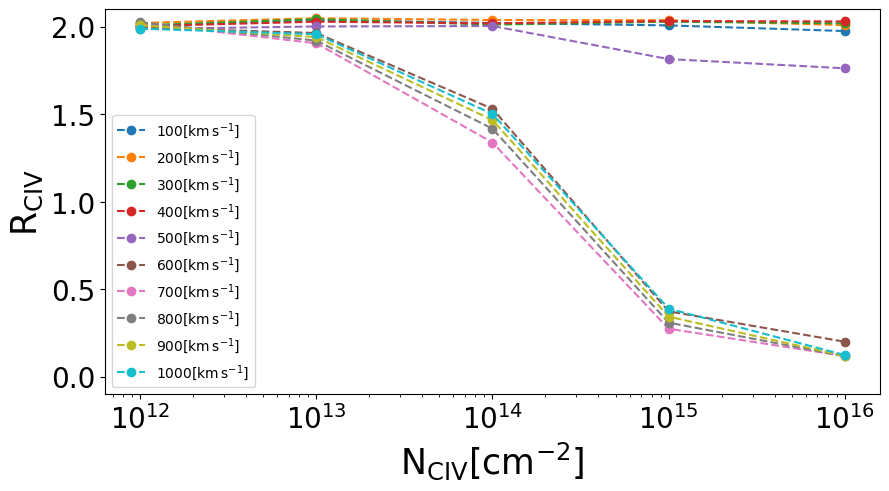

In [402]:
fig = plt.figure(1,figsize=(10,5))
for ii, jj in enumerate(ee[1:]):
    plt.plot(10**rr,ratio[ii][:],'o--',label=r'${}00 [\rm km \, s^{}]$'.format(jj,{-1}))

plt.xscale('log')
plt.xlabel(r'${\rm N}_{\rm C IV} [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'${\rm R}_{\rm C IV} $',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(np.linspace(0.0,2.0,5),fontsize=20)
plt.ylim(-0.1,2.1)
plt.legend()

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.constants import c
import astropy.units as u

# 데이터 및 상수 설정
rr = np.arange(12, 17, 1)
ee = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
# ee=[2]

rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * ee / 10
total_N_c = total_N_c.flatten()

C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm
cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952

nu_C_IV_K = cc / C_IV_K  # s-1
nu_C_IV_H = cc / C_IV_H  # s-1

xx_1 = np.zeros(len(rr) * len(ee))
scat_1 = np.zeros(len(rr) * len(ee))

directory_1 = '~/RT/C_IV/code_tes/data_C_IV_out/'
n = 0

for ii, num in enumerate(rr):
    for jj, bb in enumerate(ee):
        if bb == 0:
            path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{bb}00E+00_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
        elif bb == 10 :
            gg = 1
            path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{gg}00E+03_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
        elif  bb == -10:
            gg = -1
            path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{gg}00E+03_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
        else:
            path_sp_1 = f'{directory_1}N_atom320E+{num}_Vexp{bb}00E+02_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'


        # 데이터 읽기
        try:
            data_sp_1 = pd.read_csv(path_sp_1, sep='\s+', header=None)
        except FileNotFoundError:
            print(f"파일을 찾을 수 없습니다: {path_sp_1}")
            continue

        sp_dlam_1 = data_sp_1[0].to_numpy()
        sp_1 = data_sp_1[1].to_numpy()

        indices_K_1 = np.where(sp_dlam_1 <= 1550)[0]
        indices_H_1 = np.where(sp_dlam_1 > 1550)[0]

        sp_dlam_K = sp_dlam_1[indices_K_1]
        sp_dlam_H = sp_dlam_1[indices_H_1]

        dlam_k = sp_dlam_K[1]-sp_dlam_K[0]
        dlam_h = sp_dlam_H[1]-sp_dlam_H[0]
        dlam_sp =sp_dlam_1[1] -sp_dlam_1[0]
        print(dlam_k ,dlam_h,dlam_sp)

        sp_K = sp_1[indices_K_1]
        sp_H = sp_1[indices_H_1]

        if len(sp_K) == 0 or len(sp_H) == 0:
            print(f"데이터 부족: {path_sp_1}")
            continue

        # p_1 = np.argmax(sp_K)
        # K_line_peak_lam = sp_dlam_K[p_1]
        # K_line_peak_flux = sp_K[p_1]

        # p_2 = np.argmax(sp_H)
        # H_line_peak_lam = sp_dlam_H[p_2]
        # H_line_peak_flux = sp_H[p_2]

        nu_space = (cc / (sp_dlam_1 * 1e-8))
        del_V_space = (nu_C_IV_K / nu_space - 1) * cc / 1e5  # km/s


        indices_K_V = np.where((del_V_space<100)& (del_V_space>-100))[0]
        indices_H_V = np.where((del_V_space<600)& (del_V_space>400))[0]

        sp_V_K = del_V_space[indices_K_V]
        sp_V_H = del_V_space[indices_H_V]

        sp_K_f = sp_1[indices_K_V]
        sp_H_f = sp_1[indices_H_V] 

        KK = np.argmax(sp_K_f)
        HH = np.argmax(sp_H_f)
        K_line_peak_flux = sp_K_f[KK]
        H_line_peak_flux = sp_H_f[HH]



        pp_1 = np.where(sp_1 == K_line_peak_flux)[0]
        pp_1 = pp_1[0] if pp_1.size > 0 else None
        pp_2 = np.where(sp_1 == H_line_peak_flux)[0]
        pp_2 = pp_2[-1] if pp_2.size > 0 else None

        peak_K_V, peak_K_flux = del_V_space[pp_1], sp_1[pp_1]
        peak_H_V, peak_H_flux = del_V_space[pp_2], sp_1[pp_2]








        del_V_space_K = (peak_K_V/ sp_V_K - 1) * cc / 1e5  # km/s
        del_V_space_H = (peak_H_V/ nu_space - 1) * cc / 1e5  # km/s


        globals()[f'K_dv_{bb}_{num}'] = del_V_space_K

        globals()[f'Kf_{bb}_{num}'] =sp_K_f

        # print(len(del_V_space_K),len(sp_K_f))


        globals()[f'H_dv_{bb}_{num}'] = del_V_space_H
        globals()[f'Hf_{bb}_{num}'] = sp_H_f

        sep_point = abs(peak_H_V - peak_K_V) / 2
        # print(sep_point)
        indices_K_sp = np.where(del_V_space <= sep_point)[0]
        indices_H_sp = np.where(del_V_space > sep_point)[0]

        int_Vel_K = del_V_space[indices_K_sp]
        int_Vel_H = del_V_space[indices_H_sp]

        int_flux_K = sp_1[indices_K_sp]
        int_flux_H = sp_1[indices_H_sp]


        H_nu = (C_IV_H/C_IV_K -1 )*cc/1e5

        dh = peak_H_V - H_nu  
        globals()[f'I_K_dv_{bb}_{num}'] = int_Vel_K 
        globals()[f'I_K_f_{bb}_{num}'] = int_flux_K

        globals()[f'I_H_dv_{bb}_{num}'] = int_Vel_H  
        globals()[f'I_H_f_{bb}_{num}'] = int_flux_H      

        
        # print(bb,num)
        # 주석 처리된 플로팅 코드
        # plt.plot(int_Vel_K - peak_K_V, int_flux_K, label='K Line')
        # plt.plot(int_Vel_H - dh, int_flux_H, label='H Line')
        # plt.plot(peak_K_V - peak_K_V, peak_K_flux, 'ro', label='K Peak')
        # plt.plot(peak_H_V-peak_K_V, peak_H_flux, 'bo', label='H Peak')
        # plt.axvline(x=0,ymin=0,ymax=4000,color='k',linestyle=':')
        # print(np.where(globals()[f'I_K_dv_{bb}_{num}'] == 0))

        # plt.xlim(-200, 1000)
        # # plt.legend()
        # # plt.show()

0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.007599999999911233
0.007599999999911233 0.007499999999936335 0.00759999999

In [35]:
# ee =[1,3,5,7,9,10]
ratio = np.zeros((len(ee),len(rr)))

for ii,jj in enumerate(ee):
    for aa,bb in enumerate(rr):
        a_1 = inf(globals()[f'I_K_dv_{jj}_{bb}'],globals()[f'I_K_f_{jj}_{bb}'])
        a_2 = inf(globals()[f'I_H_dv_{jj}_{bb}'],globals()[f'I_H_f_{jj}_{bb}'])
        ratio[ii][aa] = a_1/a_2

NameError: name 'inf' is not defined

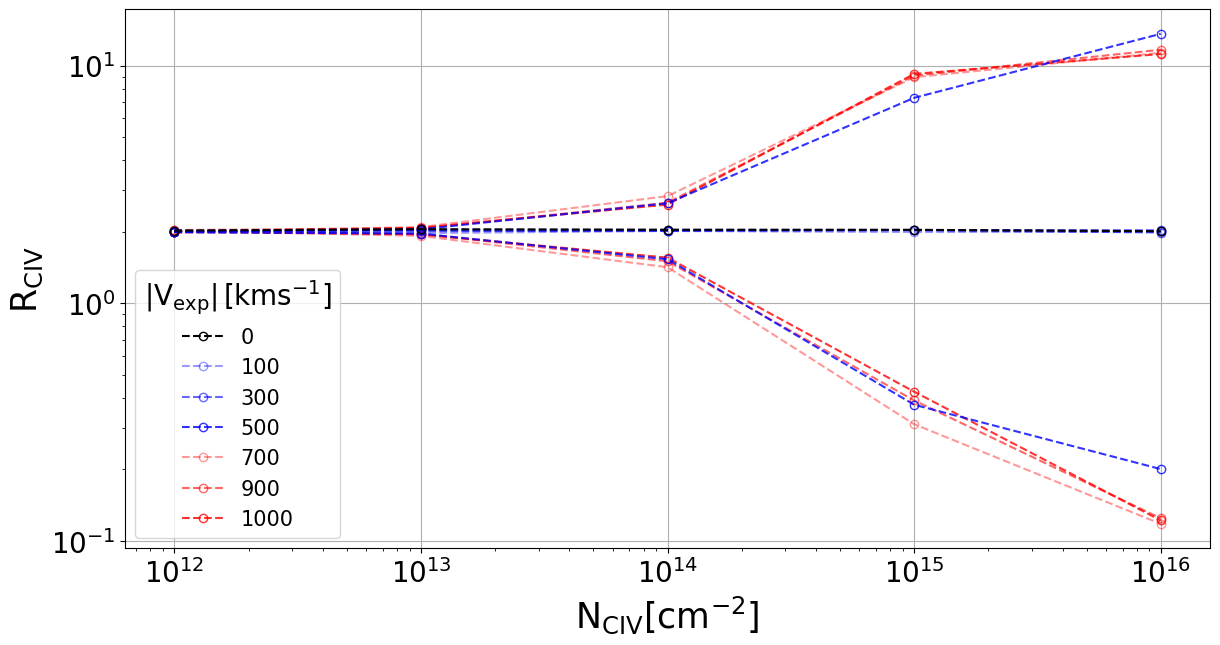

In [480]:
fig = plt.figure(1,figsize=(14,7))
from matplotlib.ticker import ScalarFormatter
# for ii, jj in enumerate(ee):

plt.plot(10**(rr), ratio[0][:], 'ro--', markerfacecolor='none',alpha=0.8,label='1000')
plt.plot(10**(rr),ratio[-1][:],'ro--', markerfacecolor='none',alpha=0.8)

plt.plot(10**(rr), ratio[1][:], 'ro--', markerfacecolor='none',alpha=0.6,label='900')
plt.plot(10**(rr),ratio[-2][:],'ro--', markerfacecolor='none',alpha=0.6)

plt.plot(10**(rr), ratio[3][:], 'ro--', markerfacecolor='none',alpha=0.4,label='700')
plt.plot(10**(rr),ratio[-4][:],'ro--', markerfacecolor='none',alpha=0.4)


plt.plot(10**(rr), ratio[5][:], 'bo--', markerfacecolor='none',alpha=0.8,label='500')
plt.plot(10**(rr),ratio[-6][:],'bo--', markerfacecolor='none',alpha=0.8)


plt.plot(10**(rr), ratio[7][:], 'bo--', markerfacecolor='none',alpha=0.6,label='300')
plt.plot(10**(rr),ratio[-8][:],'bo--', markerfacecolor='none',alpha=0.6)


plt.plot(10**(rr), ratio[9][:], 'bo--', markerfacecolor='none',alpha=0.4,label='100')
plt.plot(10**(rr),ratio[-10][:],'bo--', markerfacecolor='none',alpha=0.4)


plt.plot(10**(rr), ratio[11][:], 'ko--', markerfacecolor='none',label='0')
# plt.plot(10**(rr),ratio[-10][:],'bo--', markerfacecolor='none',alpha=0.8)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='lower left', title='$| \mathrm{V}_\mathrm{exp}|\,[\mathrm{km s^{-1}}]$', title_fontsize=20, fontsize=15)


plt.xscale('log')
plt.xlabel(r'${\rm N}_{\rm C IV} [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'${\rm R}_{\rm C IV} $',fontsize=25)
plt.xticks(fontsize=20)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.grid(True)
plt.yscale('log')
plt.yticks([0.1, 1, 10], fontsize=20)

# plt.savefig('/home/jin/바탕화면/DelV_gauss_source_ratio.pdf',bbox_inches='tight')